Loading 20 newsgroups training data
3803 documents - 6.245MB
done in 3.612 s at 1.7 MB/s
Found 47928 unique terms
done in 0.833 s at 7.5 MB/s
Found 43873 unique tokens
done in 0.826 s at 7.6 MB/s
Found 47668 unique tokens
done in 0.725 s at 8.6 MB/s
Found 43873 unique tokens


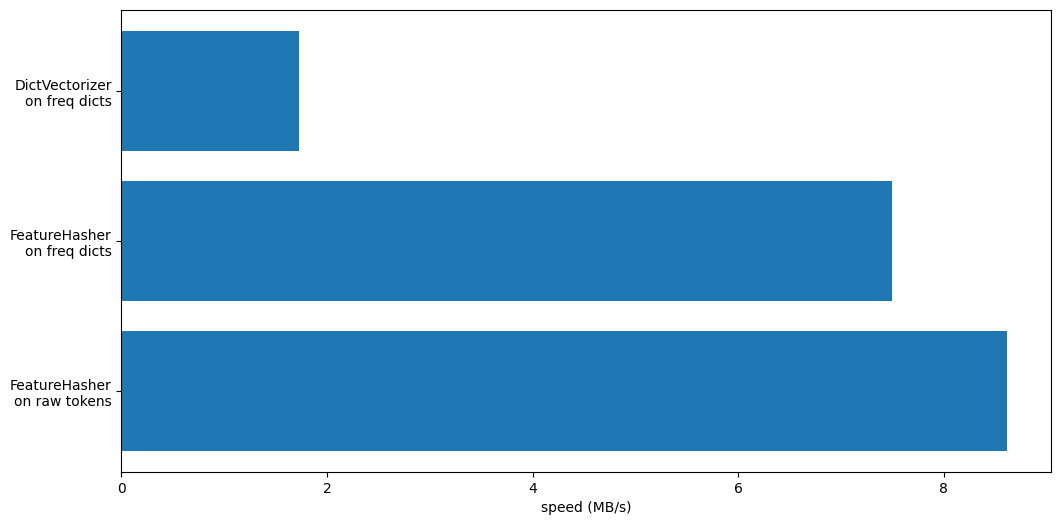

In [13]:
from sklearn.datasets import fetch_20newsgroups
categories = [
"alt.atheism",
"comp.graphics",
"comp.sys.ibm.pc.hardware",
"misc.forsale",
"rec.autos",
"sci.space",
"talk.religion.misc",
]
print("Loading 20 newsgroups training data")
raw_data, _ = fetch_20newsgroups(subset="train",
categories=categories, return_X_y=True)
data_size_mb = sum(len(s.encode("utf-8")) for s in raw_data) / 1e6
print(f"{len(raw_data)} documents - {data_size_mb:.3f}MB")
import re
def tokenize(doc):
  """Extract tokens from doc.
  This uses a simple regex that matches word characters to
  break strings
  into tokens. For a more principled approach, see
  CountVectorizer or
  TfidfVectorizer.
  """
  return (tok.lower() for tok in re.findall(r"\w+", doc))
from collections import defaultdict
def token_freqs(doc):
  """Extract a dict mapping tokens from doc to their
  occurrences."""
  freq = defaultdict(int)
  for tok in tokenize(doc):
      freq[tok] += 1
  return freq
token_freqs("That is one example, but this is another one")
list(tokenize("This is a simple example, isn't it?"))
from time import time
from sklearn.feature_extraction import DictVectorizer
dict_count_vectorizers = defaultdict(list)
t0 = time()
vectorizer = DictVectorizer()
vectorizer.fit_transform(token_freqs(d) for d in raw_data)
duration = time() - t0
dict_count_vectorizers["vectorizer"].append(
vectorizer.__class__.__name__ + "\non freq dicts"
)
dict_count_vectorizers["speed"].append(data_size_mb /
duration)
print(f"done in {duration:.3f} s at {data_size_mb / duration:.1f} MB/s")
print(f"Found {len(vectorizer.get_feature_names_out())} unique terms")
import numpy as np
def n_nonzero_columns(X):
  """Number of columns with at least one non-zero value in a
  CSR matrix.
  This is useful to count the number of features columns
  that are effectively
  active when using the FeatureHasher.
  """
  return len(np.unique(X.nonzero()[1]))
from sklearn.feature_extraction import FeatureHasher
t0 = time()
hasher = FeatureHasher(n_features=2**18)
X = hasher.transform(token_freqs(d) for d in raw_data)
duration = time() - t0
dict_count_vectorizers["vectorizer"].append(
hasher.__class__.__name__ + "\non freq dicts"
)
dict_count_vectorizers["speed"].append(data_size_mb /
duration)
print(f"done in {duration:.3f} s at {data_size_mb / duration:.1f} MB/s")
print(f"Found {n_nonzero_columns(X)} unique tokens")
t0 = time()
hasher = FeatureHasher(n_features=2**22)
X = hasher.transform(token_freqs(d) for d in raw_data)
duration = time() - t0
print(f"done in {duration:.3f} s at {data_size_mb / duration:.1f} MB/s")
print(f"Found {n_nonzero_columns(X)} unique tokens")
t0 = time()
hasher = FeatureHasher(n_features=2**18, input_type="string")
X = hasher.transform(tokenize(d) for d in raw_data)
duration = time() - t0
dict_count_vectorizers["vectorizer"].append(
hasher.__class__.__name__ + "\non raw tokens"
)
dict_count_vectorizers["speed"].append(data_size_mb /
duration)
print(f"done in {duration:.3f} s at {data_size_mb /duration:.1f} MB/s")
print(f"Found {n_nonzero_columns(X)} unique tokens")
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 6))
y_pos = np.arange(len(dict_count_vectorizers["vectorizer"]))
ax.barh(y_pos, dict_count_vectorizers["speed"],
align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels(dict_count_vectorizers["vectorizer"])
ax.invert_yaxis()
_ = ax.set_xlabel("speed (MB/s)")